In [1]:
from a5_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [2]:
def points_from_txt(path):
    data = np.loadtxt(path)
    x1 = data[:, 0]
    y1 = data[:, 1]
    x2 = data[:, 2]
    y2 = data[:, 3]

    points1 = []
    for i in range(len(x1)):
        points1.append([x1[i], y1[i]])

    points2 = []
    for i in range(len(x2)):
        points2.append([x2[i], y2[i]])
    return points1, points2

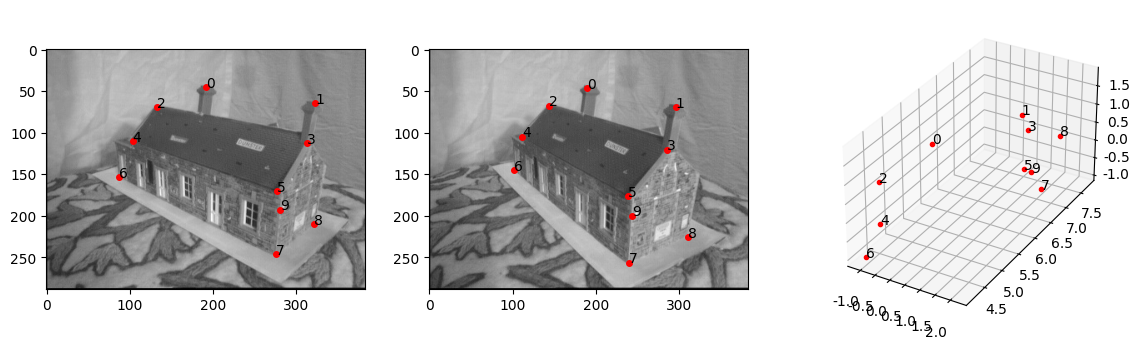

In [3]:

# (a)  Implement the function triangulate that accepts a set of correspondence points 
# and a pair of calibration matrices as an input and returns the triangulated 3D points.

def triangulate(P1, P2, point1, point2):
    A = np.zeros((4, 4))
    x1 = np.array([[0, -1, point1[1]],
                   [1, 0, -point1[0]],
                   [-point1[1], point1[0], 0]])
    x2 = np.array([[0, -1, point2[1]],
                   [1, 0, -point2[0]],
                   [-point2[1], point2[0], 0]])
    A[0:2, :] = np.dot(x1, P1)[0:2, :]
    A[2:4, :] = np.dot(x2, P2)[0:2, :]
    U, S, V = np.linalg.svd(A)
    V=V.T
    # solution is eigenvector with lowest eigenvalue
    X = V[:, 3] / V[3, 3]
    return X[:3] 

points1, points2 = points_from_txt("data/epipolar/house_points.txt")

P1 = np.loadtxt("data/epipolar/house1_camera.txt")
P2 = np.loadtxt("data/epipolar/house2_camera.txt")
results = []
for i in range(len(points1)):
    results.append(triangulate(P1, P2, points1[i], points2[i]))

T = np.array([[-1, 0, 0], [0, 0, 1], [0, -1, 0]])
results = np.dot(results, T)
house_1 = cv2.imread("data/epipolar/house1.jpg", cv2.IMREAD_GRAYSCALE) / 255
house_2 = cv2.imread("data/epipolar/house2.jpg", cv2.IMREAD_GRAYSCALE) / 255

plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
# first image and points
plt.imshow(house_1, cmap="gray")
for i in range(len(points1)):
    plt.plot(points1[i][0], points1[i][1], 'ro', markersize=4)
    plt.text(points1[i][0], points1[i][1], str(i))

plt.subplot(1,3,2)
# second image and points
plt.imshow(house_2, cmap="gray")
for i in range(len(points2)):
    plt.plot(points2[i][0], points2[i][1], 'ro', markersize=4)
    plt.text(points2[i][0], points2[i][1], str(i))

ax = plt.subplot(1,3,3, projection='3d')
for i, point in enumerate(results):
    plt.plot(point[0], point[1], point[2], 'r.')
    ax.text(point[0], point[1], point[2], str(i))
ax.set_box_aspect([1, 2, 1])
ax.set_yticks([4.5, 5, 5.5, 6, 6.5, 7, 7.5])
ax.set_yticklabels(['4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5'])
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])
ax.set_zticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax.set_zticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5'])

plt.show()